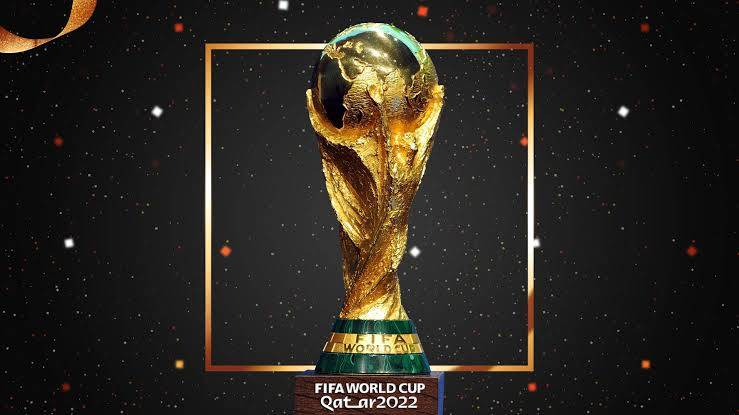

# ***Social Media Analysis Mengenai Kemeriahan Final Piala Dunia 2022 Qatar***

**Kelompok 2 :**
1. Divina Fatriandira (1906299465)
2. Eslim Suyangsu Rohmanullah (1906299471)
3. Michael Mario Bramanthyo Adhi (1906299534)
4. Zalfa Nurfadhilah Haris (1906305291)
5. Angelina Putri (2006464152) 
6. Naufal Fachri Muhammad (2006533710)

### Tautan Google Drive untuk Video Presentasi Kelompok:

https://drive.google.com/file/d/1a3dOn0_VydU1NpHlpyqNak3FbBx0An6N/view?usp=share_link

# *Problem Statements*

Piala Dunia FIFA (FIFA World Cup) adalah salah satu kompetisi sepak bola internasional paling bergengsi di dunia yang digelar setiap empat tahun sekali. Piala Dunia ini menjadi perbincangan hangat dan terkini dari berbagai kalangan masyarakat. Oleh karena itu, kelompok kami ingin mengetahui dan menganalisis data *tweet* sosial media Twitter berdasarkan beberapa tahapan, yaitu *Exploratory Data Analysis* (EDA), *Social Media Analysis*, dan *Topic Modelling* dengan harapan untuk mendapatkan *insights* yang *non trivial*. 



## *Library and Package*

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns, networkx as nx
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
import spacy
import pyLDAvis
from spacy.lang.id import Indonesian
import twint
import nest_asyncio
import urllib.request as rq
import plotly
import plotly.express as px
from bs4 import BeautifulSoup
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import Phrases
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis
import pyLDAvis.gensim_models
stemmer = StemmerFactory().create_stemmer()

# *Scraping Data*

In [5]:
#config = twint.Config()
#config.Hide_output = True
#config.Pandas = True
#config.Retweets = True
#config.Profile_full = True
#"Done"

#qry = "piala dunia 2022"
#config.Search = qry #replace the topic as you like
#config.Limit = 11000
#config.Lang = "en"
#config.Store_csv = True
#config.Since = '2022-12-18'
#config.Until = '2022-12-20'
#config.Output = "piala dunia raw.csv"

#twint.run.Search(config)
#data = twint.storage.panda.Tweets_df
#del twint, config, nest_asyncio
#print(data.shape)
#data = data.rename({'username': 'user'}, axis=1) 
#data = data[['user', 'tweet']]
#data.head()

**Catatan:**

Data yang diambil adalah data scrapping pertama kali dari tweet yang memiliki keyword **Piala Dunia 2022 Qatar**.

Pemilihan rentang tanggal adalah dimulai dari hari Final Piala Dunia 2022, yaitu tanggal **18 Desember 2022**, sampai 2 hari setelahnya, yaitu **20 Desember 2022**. Hal ini dikarenakan Final Piala Dunia 2022 Qatar masih ramai diperbincangkan oleh masyarakat di media sosial Twitter.

Dari 38 variabel data, dipilih beberapa variabel, yaitu:
* id
* tweet
* username
* photos
* video
* name
* date
* nlikes
* nretweets
* nreplies

## *Import Data* dan Melihat Info Data

In [6]:
data_raw = pd.read_csv('https://raw.githubusercontent.com/zalfaharis/FinalDatmin/main/Data%20Raw%20Piala%20Dunia%202022%20Qatar.csv')
data_raw.drop(columns = 'Unnamed: 0', inplace = True)
data_raw.head()

id                                              tweet  \
0  1604989890772418560  Piala Dunia FIFA 2022 di Qatar paling banyak d...   
1  1604989580071116800  Meski pernah merasakan gelar Piala Dunia pada ...   
2  1604989149429510144  Piala Dunia 2026 Memakai Cara Berbeda dari Pia...   
3  1604988946043514880  Piala Dunia 2026 Memakai Cara Berbeda dari Pia...   
4  1604988858906447872  #news #berita #fakta #indonesia #viral #berita...   

       username                                             photos  video  \
0     medan_sib  ['https://pbs.twimg.com/media/FkYRytMUAAETvvt....      1   
1      detikcom                                                 []      0   
2  Jankisnihbos                                                 []      0   
3  Jankisnihbos                                                 []      0   
4     rikagami1                                                 []      0   

           name                 date  nlikes  nreplies  nretweets  
0     Medan SIB  2022-12-20 06:59:43       1         0          0  
1      detikcom  2022-12-20 06:58:29      14         0          1  
2  Jankisnihbos  2022-12-20 06:56:47       1         0          1  
3  Jankisnihbos  2022-12-20 06:55:58       0         0          0  
4     rika gami  2022-12-20 06:55:37       0         0          0

**Catatan:**

Penghapusan variabel `Unnamed: 0` karena tidak digunakan


# *Data Understanding*

Berikut penjelasan dari tiap variabel pada data:
- `id` = User id dari user
- `tweet` = Isi tweet dari user
- `username` = Nama pengguna dari akun Twitter
- `photos` = Foto yang diposting dalam tweet
- `video` = Indikator ada atau tidaknya video dalam postingan tweet
    * 0 menandakan tidak ada video dalam postingan tweet
    * 1 menandakan terdapat video dalam postingan tweet
- `name` = Nama akun dari pengguna Twitter
- `date` = Tanggal dan waktu tweet diposting
- `nlikes` = Jumlah *likes* (suka) dari suatu postingan tweet
- `nreplies` = Jumlah *replies* (balasan) dari suatu postingan tweet
- `nlretweets` = Jumlah *retweets* (postingan ulang) dari suatu postingan tweet

Akan dilihat tipe data dari tiap variabel sebagai berikut.

In [7]:
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11003 entries, 0 to 11002
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         11003 non-null  int64 
 1   tweet      11003 non-null  object
 2   username   11003 non-null  object
 3   photos     11003 non-null  object
 4   video      11003 non-null  int64 
 5   name       11003 non-null  object
 6   date       11003 non-null  object
 7   nlikes     11003 non-null  int64 
 8   nreplies   11003 non-null  int64 
 9   nretweets  11003 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 859.7+ KB
None


In [8]:
# mengubah tipe data menjadi datetime.
data_raw['date'] = pd.to_datetime(data_raw['date'],format='%Y-%m-%d %H:%M:%S', errors='coerce')

### Pengecekan duplikasi dan *missing value* pada data set

Selanjutnya akan melihat data set yang kita gunakan terdapat duplikat atau tidak. Jika terdapat duplikat pada data set, maka data tersebut akan di*remove* dari data set.

In [9]:
# Mencari dan menghilangkan data yang terduplikasi.
print("Jumlah data yang terduplikasi berdasarkan tweet dan username:")
print(data_raw.duplicated(subset = ['tweet','username']).sum())
data_raw.drop_duplicates(subset = ['tweet','username'], inplace = True)
print("Duplicated data by tweet and username after removal :")
print(data_raw.duplicated(subset = ['tweet','username']).sum())

Jumlah data yang terduplikasi berdasarkan tweet dan username:
62
Duplicated data by tweet and username after removal :
0


**Catatan:**

Definisi duplikasi data yang dimaksud adalah saat satu pengguna twitter mem*posting* lebih dari satu tweet dengan isi yang sama, sehingga pengecekan duplikasi data hanya dilakukan pada variabel `tweet` dan `username`.

In [10]:
df_mv = data_raw.isnull().sum()                      # menampilkan jumlah total missing value per kolom
df_pmv = (data_raw.isnull().sum()/len(data_raw))*100     # menampilkan persentase missing value per kolom

df_missing = pd.concat([df_mv,df_pmv],axis = 1).reset_index() # menampilkan data dalam bentuk data frame

df_missing.columns = ['Kolom','Jumlah Missing Value','Persentase Missing Value']
missing_value = df_missing

print('Data Missing Value:\n')
print(missing_value.sample(5),'\n')
print('Persentase Missing Value Terbesar                  : ',missing_value['Persentase Missing Value'].max())
print('Persentase Missing Value Keseluruhan               : ',missing_value['Persentase Missing Value'].sum())


print('Data Duplikat:\n')
print('Jumlah terdapat data duplikat pada data df         : ',data_raw.duplicated().sum(), '(',(data_raw.duplicated().sum()/len(data_raw))*100,'%',')')

Data Missing Value:

       Kolom  Jumlah Missing Value  Persentase Missing Value
0         id                     0                       0.0
1      tweet                     0                       0.0
5       name                     0                       0.0
4      video                     0                       0.0
9  nretweets                     0                       0.0 

Persentase Missing Value Terbesar                  :  0.0
Persentase Missing Value Keseluruhan               :  0.0
Data Duplikat:

Jumlah terdapat data duplikat pada data df         :  0 ( 0.0 % )


**Catatan:**

Tidak terdapat duplikasi dan tidak terdapat *missing value* pada data set yang akan digunakan.

In [11]:
#Informasi terkait data set setelah dilakukan penghapusan duplikasi pada data
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10941 entries, 0 to 11002
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         10941 non-null  int64         
 1   tweet      10941 non-null  object        
 2   username   10941 non-null  object        
 3   photos     10941 non-null  object        
 4   video      10941 non-null  int64         
 5   name       10941 non-null  object        
 6   date       10941 non-null  datetime64[ns]
 7   nlikes     10941 non-null  int64         
 8   nreplies   10941 non-null  int64         
 9   nretweets  10941 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 940.2+ KB
None


## *Preprocessing* dan Tokenisasi (NLP) Bahasa Indonesia

In [12]:
# Membuat filter tweet dengan regex.
emailPattern = re.compile(r'[\w._%+-]+@[\w\.-]+\.[a-zA-Z]{2,4}')
urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
phonePattern = re.compile(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})')
numbers_pattern = re.compile(r'[0-9]')
hastag_pattern = re.compile(r"#(\w+)")
hastag_pattern_split = re.compile(r'[A-Z][^A-Z]*')
filter_laugh = re.compile(r"\b(?:a*(?:ha)+h?|(?:w+k+)+w+k|(?:w+k+)+w+k+k|(?:a+w+o+k+)+w+o+k|(?:l+o)+l)\b")

**Catatan:**
Dilakukan pemfilteran `tweet` menggunakan Regex.

Filter yang dilakukan antara lain adalah:
* Mencari kata yang berupa email dalam `tweet`
* Mencari kata yang berupa tautan (*url/link*) dalam `tweet`
* Mencari nomor telepon dalam `tweet`
* Mencari tanda tagar dan memisahkan kata per kata dalam `tweet`
* Mencari kata yang mengandung tawa, seperti "wkwkwk", "hahaha", dan sebagainya dalam `tweet`

Untuk ke tahap selanjutnya, akan didefinisikan *stop words* dan *slang* (singkatan kata) 

In [13]:
# Stop words & Slangs.

Sastrawi_StopWords_id = StopWordRemoverFactory().get_stop_words()
Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)
Sastrawi_StopWords_id.add('rt')
print("Count stop words :")
print(len(Sastrawi_StopWords_id))

# Menambahkan stop words baru dari internet.
html = rq.urlopen('https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt')
raw = BeautifulSoup(html).text
new_stopwords = raw.split('\n')
for kata in new_stopwords:
    Sastrawi_StopWords_id.add(kata)
print("Count new stop words :")
print(len(Sastrawi_StopWords_id))

# kata-kata slang.
SlangS = {'gan':'juragan', 'yg':'yang', 'dgn':'dengan', 'u': 'you', 'ndak':'tidak', 'sesok':'besok', 'gw' : 'saya', 'lo' : 'kamu', 'bokap' : 'ayah', 'nyokap': 'ibu', 'sokin' : 'sini', 'mager' : 'males',
         'julid' : 'iri', 'ngga' : 'tidak', 'jd' : 'jadi', 'sabeb' : 'bebas', 'sabi' : 'bisa', 'cabs' : 'cabut', 'woles' : 'santai', 'rokum' : 'rumah', 'cabs' : 'pergi', 'saik' : 'asik', 'i' : 'saya', 'I' : 'saya'} 

add_slangwords = ["blm","udh","lg","ud","spt","min","ntn","bravo","krn","sm","team","suek","mantul","anjay","anjas","anjir","nongki"]
baku_words = ["belum","sudah","lagi","sudah","seperti","admin","tonton","keren","karena","sama","tim","sialan","mantap betul","keren","keren","sialan","nongkrong bareng"]
zipped_ = list(zip(add_slangwords,baku_words))
print("Count of new slangs :")
print(len(zipped_))
print("Original slangs :")
print(len(SlangS))

# menambahkan beberapa kata slang baru.
for val in zipped_:
    SlangS[val[0]] = val[1]
print("New slangs :")
print(len(SlangS))

Count stop words :
124
Count new stop words :
775
Count of new slangs :
17
Original slangs :
23
New slangs :
40


In [14]:
# Menghilangkan huruf yang berulang di akhir kata. misal : Sayaaa -> saya.
def remove_doublewords(word):
    try :
        int_converted = int(word)
        return word
    except :
        if word[-2] == word[-1] :
            for i in range(2, len(word)+1):
                if word[-i] != word[-i+1]:
                    word = word[:-i+2]
                    break            
            return word
        else:
            return word

# Menghilangkan tagar
def remove_hastag(text):
    tags = re.findall(hastag_pattern,text)
    for tag in tags:
        proper_words = ' '.join(re.findall(hastag_pattern_split,tag))
        text = text.replace("#" + tag, proper_words)
    return text

# Melakukan post tagging.
def nlpfilter(tokens):
    ct = CRFTagger()
    ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')
    filters = set(['NN', 'NNP', 'NNS', 'NNPS', 'JJ'])
    hasil_ = ct.tag_sents([tokens])
    return ' '.join([k[0] for k in hasil_[0] if k[1] in filters])

# Menghitung nilai coherence.
def compute_coherence_values(id2word, corpus, texts, limit=1, start=2, step=1):
    coherence_values = []
    for num_topics in range(start, limit, step):
        LDAmodel_ = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
        cm = CoherenceModel(model=LDAmodel_, texts=texts, corpus=corpus, coherence='c_v')
        with np.errstate(invalid='ignore'):
            coherence_values.append(cm.get_coherence())
    return coherence_values

# Fungsi untuk membersihkan tweet.
def cleanText(txt):
    docx = re.sub(urlPattern,' ', txt) # remove links
    docx = re.sub(emailPattern, ' ', docx) # remove email
    docx = remove_hastag(docx) # remove hashtag
    docx = unidecode(unescape(docx.lower().strip())) # remove emoticon and etc
    docx = re.sub(r'[^\w]', ' ', docx) # remove symbol, keep "_"
    docx = re.sub(filter_laugh,' ',docx) # rmeove laughing words
    Tokens = TextBlob(docx).words # Tokenisasi
    Tokens = [remove_doublewords(t) if len(t) > 2 else t for t in Tokens]# remove double words
    Tokens = [SlangS[t] if (SlangS.get(t) != None) else t for t in Tokens] # convert slangs
    Tokens = [t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]# Stopwords filtering
    docx= nlpfilter(Tokens)
    docx = stemmer.stem(docx)
    return docx # Silahkan latihan tambahkan penanganan Slang/Singkatan

**Catatan:**

Telah dilakukan filter untuk `tweet` sebagai berikut.
* Mengubah *double words* dalam `tweet` menjadi kata asli, seperti "tadii" menjadi "tadi", dsb.
* Menghilangkan tanda tagar dan memisahkan kata per kata dalam `tweet`
* Menghilangkan kata yang berupa tautan (*url/link*) dalam `tweet`
* Menghilangkan nomor telepon dalam `tweet`
* Menghilangkan imbuhan pada kata dalam `tweet` menjadi kata dasar 

In [15]:
# Melalukan tes pada suatu string
tweet_test = "Potret kepedulian personel Polwan RI #MelindungiMelayaniWarga saat menggelar trauma healing untuk anak-anak pengungsian di Cianjur, Jawa Barat.\
Sinergitas Untuk Negeri #Poldajabar.25  https://t.co/fx7C6ShJ8x wkwkwkwk gw juga turut perihatin cabs dulu ya, messiii, mengibaratkannya mengerjakan sejauh pertanyakan dong \U0001F62A 2022"
new_tweet_test = cleanText(tweet_test)
print("Before :")
print(tweet_test)
print(" ")
print("After :")
print(new_tweet_test)

Before :
Potret kepedulian personel Polwan RI #MelindungiMelayaniWarga saat menggelar trauma healing untuk anak-anak pengungsian di Cianjur, Jawa Barat.Sinergitas Untuk Negeri #Poldajabar.25  https://t.co/fx7C6ShJ8x wkwkwkwk gw juga turut perihatin cabs dulu ya, messiii, mengibaratkannya mengerjakan sejauh pertanyakan dong 😪 2022
 
After :
potret peduli personel polwan warga gelar trauma healing anak anak ungsi cianjur barat sinergitas negeri poldajabar perihatin messi


In [16]:
# Membuat variabel baru yang berisikan tweet yang sudah dibersihkan
data_raw['clean tweets'] = data_raw.loc[:,'tweet'].apply(cleanText)

In [17]:
# Membuat copy
data_clean = data_raw.copy()
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10941 entries, 0 to 11002
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            10941 non-null  int64         
 1   tweet         10941 non-null  object        
 2   username      10941 non-null  object        
 3   photos        10941 non-null  object        
 4   video         10941 non-null  int64         
 5   name          10941 non-null  object        
 6   date          10941 non-null  datetime64[ns]
 7   nlikes        10941 non-null  int64         
 8   nreplies      10941 non-null  int64         
 9   nretweets     10941 non-null  int64         
 10  clean tweets  10941 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 1.0+ MB
None


In [18]:
data_clean.head()

id                                              tweet  \
0  1604989890772418560  Piala Dunia FIFA 2022 di Qatar paling banyak d...   
1  1604989580071116800  Meski pernah merasakan gelar Piala Dunia pada ...   
2  1604989149429510144  Piala Dunia 2026 Memakai Cara Berbeda dari Pia...   
4  1604988858906447872  #news #berita #fakta #indonesia #viral #berita...   
5  1604988458002395136  Kingsley Coman Jadi Korban Rasisme Usai Final ...   

       username                                             photos  video  \
0     medan_sib  ['https://pbs.twimg.com/media/FkYRytMUAAETvvt....      1   
1      detikcom                                                 []      0   
2  Jankisnihbos                                                 []      0   
4     rikagami1                                                 []      0   
5    KompasBola                                                 []      0   

           name                date  nlikes  nreplies  nretweets  \
0     Medan SIB 2022-12-20 06:59:43       1         0          0   
1      detikcom 2022-12-20 06:58:29      14         0          1   
2  Jankisnihbos 2022-12-20 06:56:47       1         0          1   
4     rika gami 2022-12-20 06:55:37       0         0          0   
5    KompasBola 2022-12-20 06:54:02       2         0          0   

                                        clean tweets  
0          piala dunia fifa qatar media sosial messi  
1  gelar piala dunia kylian mbappe sedih gagal ju...  
2                            piala dunia piala dunia  
4                              kini arti piala dunia  
5  coman korban rasisme final piala dunia bayern ...

**Catatan:**

Membuat *data frame* baru yang terdapat kolom `clean tweet`, yaitu berisikan `tweet` yang sudah dibersihkan dengan nama "data_clean"

## *Exploratory Data Analysis (EDA)*

Berikut akan ditampilkan 10 postingan `tweet` tertinggi berdasarkan *retweets* dan *likes* terbanyak.

In [19]:
# Melihat nama akun dan tweet yang menjadi top 10 berdasarkan retweets dan likes.
grouped_1 = data_clean.groupby('tweet')[['nretweets','nlikes']].sum()
top_10_2 = grouped_1.nlargest(10,['nretweets','nlikes']).reset_index()
top_10_2
name = [data_clean[data_clean['tweet'] == i]['name'].values[0] for i in top_10_2['tweet']]
top_10_2['name'] = name
top_10_2

tweet  nretweets  nlikes  \
0  Rekapan keseruan reaksi final piala dunia 2022...       3830   13741   
1  Untuk keempat kalinya secara beruntun, EA Spor...       1350    8404   
2  • 64 Pertandingan • 172 Goal  • 3,404,252 keha...       1049    5746   
3  Yuk tebak skor Argentina vs Prancis  Syaratnya...       1024     781   
4  Usai sudah 64 pertandingan di Piala Dunia 2022...        629    3141   
5  2022: ARGENTINA JUARA PIALA DUNIA. ⭐️⭐️⭐️  (En...        622    3115   
6  "Selamat anak-anakku Argentina, telah berhasil...        510    1398   
7  PEMAIN TERBAIK PIALA DUNIA 2022, 🐐🇦🇷  https://...        354    2308   
8  Untuk sampai kesini, Messi telah melalui keped...        343    1425   
9  RASMI  PEMENANG ANUGERAH PIALA DUNIA FIFA QATA...        340     741   

                      name  
0              Yono bakrie  
1     Extra Time Indonesia  
2             Fakta Bola ⚽  
3  Info Suporter Indonesia  
4     Extra Time Indonesia  
5     Extra Time Indonesia  
6             Komisi Wasit  
7     Extra Time Indonesia  
8       The Reds Indonesia  
9     Irfan_newboys🇲🇾🇵🇸🏳️🏴

**Catatan:**

- `tweet` dari Yono bakrie menduduki posisi pertama dalam 10 `tweet` tertinggi dengan *retweets* sebanyak 3830 dan *likes* sebanyak 13741
- Empat `tweet` dari Extra Time Indonesia masuk ke dalam 10 `tweet` tertinggi dengan total *retweets* sebanyak 2955 dan *likes* sebanyak 16968
- `tweet` dari Fakta Bola menduduki posisi ketiga dalam 10 `tweet` tertinggi dengan *retweets* sebanyak 1049 dan *likes* sebanyak 5746

Akan dilihat apakah keberadaan video pada `tweet` cenderung memengaruhi *likes* dan *retweets*

In [20]:
#Membuat variabel baru berdasarkan status ada atau tidaknya video pada tweet.
video_ = data_clean[data_clean["video"] == 1]
wvideo_ = data_clean[data_clean["video"] == 0]

#Akan dilihat apakah terdapat perbedaan jumlah retweets dan likes berdasarkan status ada atau tidaknya video pada tweet.
video_likes = video_["nlikes"].sum()
video_retweets = video_["nretweets"].sum()

wvideo_likes = wvideo_["nlikes"].sum()
wvideo_retweets = wvideo_["nretweets"].sum()

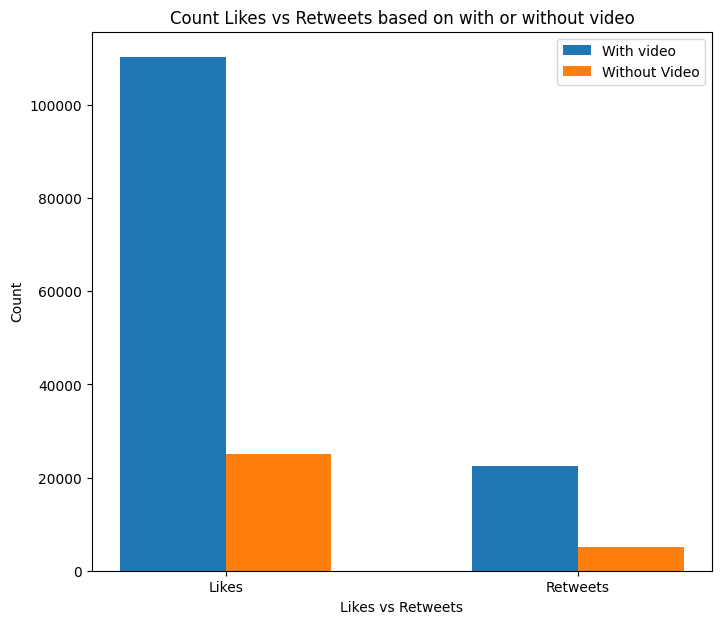

In [21]:
# Jumlah bar
N = 2

# Mendefinisikan tinggi dari bar 1 dan 2
bar_1 = (video_likes,video_retweets)
bar_2 = (wvideo_likes,wvideo_retweets)

ind = np.arange(N)
plt.figure(figsize=(8,7))
width = 0.3       

# Plotting
plt.bar(ind, bar_1, width, label='With video')
plt.bar(ind + width, bar_2, width, label='Without Video')
plt.xlabel('Likes vs Retweets')
plt.ylabel('Count')
plt.title('Count Likes vs Retweets based on with or without video')
plt.xticks(ind + width / 2, ('Likes', 'Retweets'))
plt.legend(loc='best')
plt.show()

**Catatan:**

Berdasarkan visualisasi *bar count likes* dan *retweets* dengan video vs tanpa video, terlihat bahwa `tweet` yang menyertakan video cenderung memiliki jumlah likes dan retweets lebih banyak dibandingkan yang tidak menyertakan video.

Maka dari itu, akan dicek kembali apakah `tweet` yang menyertakan video cenderung memiliki jumlah *likes* dan *retweets* lebih banyak dibandingkan tanpa video dengan cara melihat *top* 5 *retweets* dan *likes* terbanyak pada `tweet` yang menyertakan video vs tanpa video sebagai berikut:

In [22]:
# Akan dilihat top 5 data berdasarkan retweets apabila dalam tweet terdapat video.
top_5_2 = video_[['tweet','nretweets','name']].nlargest(5,'nretweets')

# Akan dilihat top 5 data berdasarkan retweets apabila dalam tweet tidak terdapat video.
top_5_3 = wvideo_[['tweet','nretweets','name']].nlargest(5,'nretweets')

# Akan dilihat top 5 data berdasarkan likes apabila dalam tweet terdapat video.
top_5_4 = video_[['tweet','nlikes','name']].nlargest(5,'nlikes')

# Akan dilihat top 5 data berdasarkan likes apabila dalam tweet tidak terdapat video.
top_5_5 = wvideo_[['tweet','nlikes','name']].nlargest(5,'nlikes')

In [23]:
# Data top 5 retweets dengan video.
top_5_2

tweet  nretweets  \
1844   Rekapan keseruan reaksi final piala dunia 2022...       3830   
5879   Untuk keempat kalinya secara beruntun, EA Spor...       1350   
5253   • 64 Pertandingan • 172 Goal  • 3,404,252 keha...       1049   
10813  Yuk tebak skor Argentina vs Prancis  Syaratnya...       1024   
5365   Usai sudah 64 pertandingan di Piala Dunia 2022...        629   

                          name  
1844               Yono bakrie  
5879      Extra Time Indonesia  
5253              Fakta Bola ⚽  
10813  Info Suporter Indonesia  
5365      Extra Time Indonesia

In [24]:
# Data top 5 retweets tanpa video.
top_5_3

tweet  nretweets  \
5574  RASMI  PEMENANG ANUGERAH PIALA DUNIA FIFA QATA...        340   
6654  Piala Dunia 2022 Qatar akan jadi salah satu Pi...        306   
5900  BECAUSE IM SO HAPPYYYYYYY ARGENTINA FINALLY WO...        187   
2202  Save termahal di Piala Dunia 2022, menit 120, ...        180   
898   @nyktofilos @westenthu "piala dunia ni bos sen...        104   

                      name  
5574  Irfan_newboys🇲🇾🇵🇸🏳️🏴  
6654          Fakta Bola ⚽  
5900   world cup champs!🇦🇷  
2202  Extra Time Indonesia  
898                Nothing

In [25]:
# Data top 5 likes dengan video.
top_5_4

tweet  nlikes  \
1844  Rekapan keseruan reaksi final piala dunia 2022...   13741   
5879  Untuk keempat kalinya secara beruntun, EA Spor...    8404   
6197  Rated untuk final piala dunia 2022? 💭  https:/...    6372   
5253  • 64 Pertandingan • 172 Goal  • 3,404,252 keha...    5746   
5365  Usai sudah 64 pertandingan di Piala Dunia 2022...    3141   

                      name  
1844           Yono bakrie  
5879  Extra Time Indonesia  
6197              convomfs  
5253          Fakta Bola ⚽  
5365  Extra Time Indonesia

In [26]:
# Data top 5 likes tanpa video.
top_5_5

tweet  nlikes  \
898   @nyktofilos @westenthu "piala dunia ni bos sen...    3290   
2202  Save termahal di Piala Dunia 2022, menit 120, ...    1220   
3191  Jubah Bisht Messi di Piala Dunia 2022 Menuai K...     743   
5574  RASMI  PEMENANG ANUGERAH PIALA DUNIA FIFA QATA...     741   
6654  Piala Dunia 2022 Qatar akan jadi salah satu Pi...     682   

                      name  
898                Nothing  
2202  Extra Time Indonesia  
3191         CNN Indonesia  
5574  Irfan_newboys🇲🇾🇵🇸🏳️🏴  
6654          Fakta Bola ⚽

**Catatan:**

Terlihat dari empat tabel di atas bahwa *top* 5  `tweet` yang menyertakan video memiliki *retweets* dan *likes* cenderung lebih banyak dibandingkan dengan *top* 5 `tweet` tanpa video.

Hal ini memperjelas visualisasi *bar count likes* dan *retweets* dengan video vs tanpa video bahwa jumlah *likes* dan *retweets* `tweet` dengan menyertakan video cenderung lebih banyak dibandingkan dengan `tweet` tanpa video.

Oleh karena itu, terdapat kecenderungan pengaruh dari keberadaan video pada `tweet` (disertakan dan tidak disertakan) dengan asumsi faktor lain konstan (misalnya: popularitas akun, jumlah *followers*, keaktifan akun, dsb.) 

Akan dilihat juga apakah keberadaan foto pada `tweet` cenderung memengaruhi *likes* dan *retweets*.

In [27]:
#Membuat variabel baru berdasarkan status ada atau tidaknya gambar pada tweet
wphotos_ = data_clean[data_clean["photos"] == '[]']
photos_ = data_clean[data_clean["photos"] != '[]']

#Akan dilihat apakah terdapat perbedaan jumlah retweets dan likes berdasarkan status ada atau tidaknya gambar pada tweet.
photos_likes = photos_["nlikes"].sum()
photos_retweets = photos_["nretweets"].sum()
wphotos_likes = wphotos_["nlikes"].sum()
wphotos_retweets = wphotos_["nretweets"].sum()

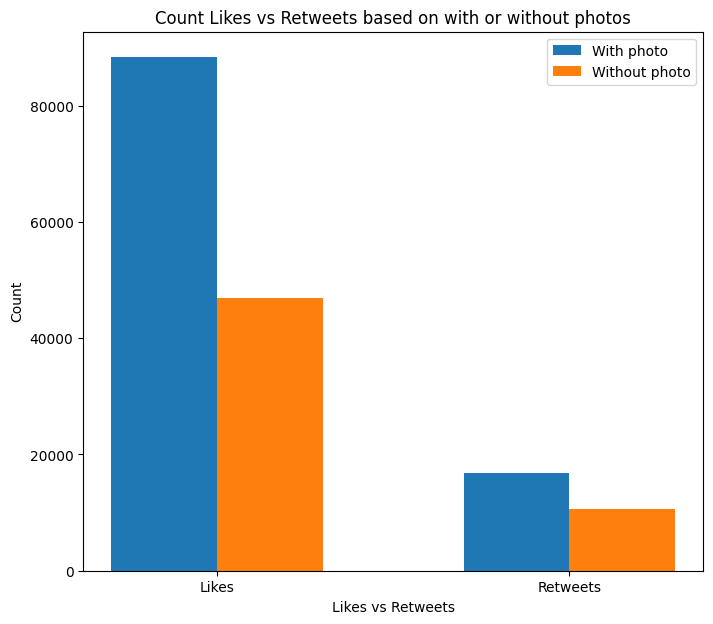

In [28]:
# Jumlah bar.
N = 2

# Mendefinisikan tinggi dari bar 1 dan 2
bar_1 = (photos_likes,photos_retweets)
bar_2 = (wphotos_likes,wphotos_retweets)

ind = np.arange(N)
plt.figure(figsize=(8,7))
width = 0.3       

# Plotting
plt.bar(ind, bar_1, width, label='With photo')
plt.bar(ind + width, bar_2, width, label='Without photo')
plt.xlabel('Likes vs Retweets')
plt.ylabel('Count')
plt.title('Count Likes vs Retweets based on with or without photos')
plt.xticks(ind + width / 2, ('Likes', 'Retweets'))
plt.legend(loc='best')
plt.show()

**Catatan:**

Berdasarkan visualisasi *bar count likes* dan *retweets* dengan *photos* vs tanpa *photos*, terlihat bahwa postingan tweet yang menyertakan foto cenderung memiliki jumlah likes* dan *retweets* lebih banyak dibandingkan yang tidak menyertakan foto.

Maka dari itu, akan dicek kembali apakah `tweet` yang menyertakan video cenderung memiliki jumlah likes* dan *retweets* lebih banyak dibandingkan tanpa foto dengan cara melihat *top* 5 *retweets* dan *likes* terbanyak pada `tweet` menyertakan foto vs tanpa foto.

In [29]:
# Akan dilihat top 5 data berdasarkan retweets apabila dalam tweet terdapat foto.
top_5_6 = photos_[['tweet','nretweets','name']].nlargest(5,'nretweets')

# Akan dilihat top 5 data berdasarkan retweets apabila dalam tweet tidak terdapat foto.
top_5_7 = wphotos_[['tweet','nretweets','name']].nlargest(5,'nretweets')

# Akan dilihat top 5 data berdasarkan retweets apabila dalam tweet terdapat foto.
top_5_8 = photos_[['tweet','nlikes','name']].nlargest(5,'nlikes')

# Akan dilihat top 5 data berdasarkan retweets apabila dalam tweet tidak terdapat foto.
top_5_9 = wphotos_[['tweet','nlikes','name']].nlargest(5,'nlikes')

In [30]:
# Data top 5 retweets dengan foto.
top_5_6

tweet  nretweets  \
5879   Untuk keempat kalinya secara beruntun, EA Spor...       1350   
5253   • 64 Pertandingan • 172 Goal  • 3,404,252 keha...       1049   
10813  Yuk tebak skor Argentina vs Prancis  Syaratnya...       1024   
5365   Usai sudah 64 pertandingan di Piala Dunia 2022...        629   
6413   2022: ARGENTINA JUARA PIALA DUNIA. ⭐️⭐️⭐️  (En...        622   

                          name  
5879      Extra Time Indonesia  
5253              Fakta Bola ⚽  
10813  Info Suporter Indonesia  
5365      Extra Time Indonesia  
6413      Extra Time Indonesia

In [31]:
# Data top 5 retweets tanpa foto.
top_5_7

tweet  nretweets  \
1844  Rekapan keseruan reaksi final piala dunia 2022...       3830   
5574  RASMI  PEMENANG ANUGERAH PIALA DUNIA FIFA QATA...        340   
6654  Piala Dunia 2022 Qatar akan jadi salah satu Pi...        306   
2560  "Sssttt minute of silence for Mbappe.."  - Emi...        198   
5900  BECAUSE IM SO HAPPYYYYYYY ARGENTINA FINALLY WO...        187   

                      name  
1844           Yono bakrie  
5574  Irfan_newboys🇲🇾🇵🇸🏳️🏴  
6654          Fakta Bola ⚽  
2560  Extra Time Indonesia  
5900   world cup champs!🇦🇷

In [32]:
# Data top 5 likes dengan foto.
top_5_8

tweet  nlikes  \
5879  Untuk keempat kalinya secara beruntun, EA Spor...    8404   
6197  Rated untuk final piala dunia 2022? 💭  https:/...    6372   
5253  • 64 Pertandingan • 172 Goal  • 3,404,252 keha...    5746   
5365  Usai sudah 64 pertandingan di Piala Dunia 2022...    3141   
6413  2022: ARGENTINA JUARA PIALA DUNIA. ⭐️⭐️⭐️  (En...    3115   

                      name  
5879  Extra Time Indonesia  
6197              convomfs  
5253          Fakta Bola ⚽  
5365  Extra Time Indonesia  
6413  Extra Time Indonesia

In [33]:
# Data top 5 likes tanpa foto.
top_5_9

tweet  nlikes  \
1844  Rekapan keseruan reaksi final piala dunia 2022...   13741   
898   @nyktofilos @westenthu "piala dunia ni bos sen...    3290   
2560  "Sssttt minute of silence for Mbappe.."  - Emi...    1352   
2202  Save termahal di Piala Dunia 2022, menit 120, ...    1220   
5236  Messi Reaction ... . . The last Goal to bring ...     976   

                       name  
1844            Yono bakrie  
898                 Nothing  
2560   Extra Time Indonesia  
2202   Extra Time Indonesia  
5236  Game/Badminton Addict

**Catatan:**

Terlihat dari empat tabel di atas bahwa *top* 5  `tweet` yang menyertakan foto memiliki *retweets* dan *likes* cenderung lebih banyak dibandingkan dengan *top* 5 `tweet` tanpa foto.

Hal ini memperjelas visualisasi *bar count likes* dan *retweets* dengan *photos* vs tanpa *photos* bahwa jumlah *likes* dan *retweets* `tweet` dengan menyertakan foto cenderung lebih banyak dibandingkan dengan `tweet` tanpa foto.

Oleh karena itu, terdapat kecenderungan pengaruh dari keberadaan foto pada `tweet` (disertakan dan tidak disertakan) dengan asumsi faktor lain konstan (misalnya: popularitas akun, jumlah *followers*, keaktifan akun, dsb.) 

Namun, perhatikan bahwa terdapat outlier satu observasi yang menduduki posisi pertama dengan jumlah *likes* dan *retweets* terbanyak dalam `tweet` tanpa foto. Setelah diselidiki lebih lanjut, `tweet` dari Yono bakrie tersebut ternyata menyertakan video dan juga masuk ke dalam *top* 5 `tweet` yang menyertakan video.

Maka dari itu, akan ditinjau kembali berdasarkan keberadaan *media* (menyertakan foto atau video) dan *without media* (tidak menyertakan foto dan video) sebagai berikut:

In [34]:
#Membuat variabel baru berdasarkan keberadaan ada atau tidaknya media pada tweet.
wmedia_ = data_clean[(data_clean["photos"] == '[]') & (data_clean["video"] == 0)]
media_ = data_clean[(data_clean["photos"] != '[]') | (data_clean["video"] == 1)]

#Akan dilihat apakah terdapat perbedaan jumlah retweets dan likes berdasarkan keberadaan ada atau tidaknya media pada tweet.
media_likes = media_["nlikes"].sum()
media_retweets = media_["nretweets"].sum()
wmedia_likes = wmedia_["nlikes"].sum()
wmedia_retweets = wmedia_["nretweets"].sum()

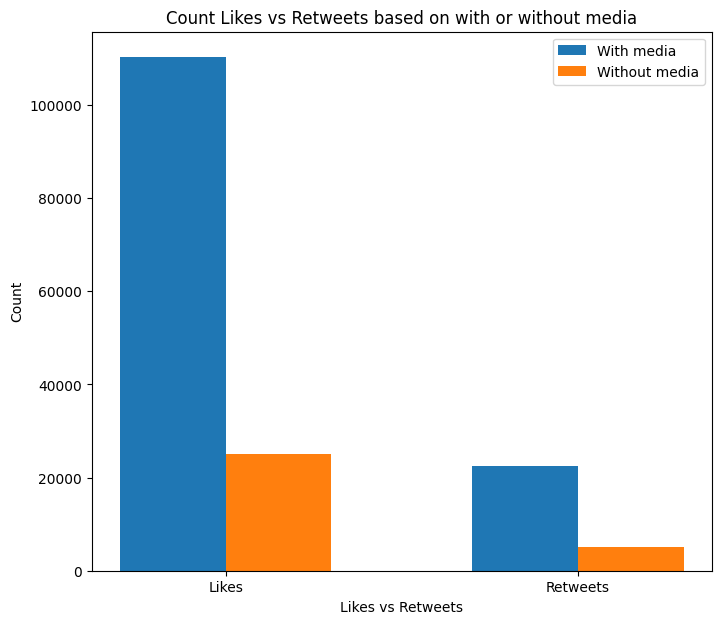

In [35]:
# Jumlah bar.
N = 2

# Mendefinisikan tinggi dari bar 1 dan 2
bar_1 = (media_likes,media_retweets)
bar_2 = (wmedia_likes,wmedia_retweets)

ind = np.arange(N)
plt.figure(figsize=(8,7))
width = 0.3       

# Plotting
plt.bar(ind, bar_1, width, label='With media')
plt.bar(ind + width, bar_2, width, label='Without media')
plt.xlabel('Likes vs Retweets')
plt.ylabel('Count')
plt.title('Count Likes vs Retweets based on with or without media')
plt.xticks(ind + width / 2, ('Likes', 'Retweets'))
plt.legend(loc='best')
plt.show()

In [36]:
# Akan dilihat top 5 data berdasarkan retweets apabila dalam tweet terdapat media.
top_5_10 = media_[['tweet','nretweets','name']].nlargest(5,'nretweets')

# Akan dilihat top 5 data berdasarkan retweets apabila dalam tweet tidak terdapat media.
top_5_11 = wmedia_[['tweet','nretweets','name']].nlargest(5,'nretweets')

# Akan dilihat top 5 data berdasarkan retweets apabila dalam tweet terdapat media.
top_5_12 = media_[['tweet','nlikes','name']].nlargest(5,'nlikes')

# Akan dilihat top 5 data berdasarkan retweets apabila dalam tweet tidak terdapat media.
top_5_13 = wmedia_[['tweet','nlikes','name']].nlargest(5,'nlikes')

In [37]:
# Data top 5 retweets dengan media.
top_5_10

tweet  nretweets  \
1844   Rekapan keseruan reaksi final piala dunia 2022...       3830   
5879   Untuk keempat kalinya secara beruntun, EA Spor...       1350   
5253   • 64 Pertandingan • 172 Goal  • 3,404,252 keha...       1049   
10813  Yuk tebak skor Argentina vs Prancis  Syaratnya...       1024   
5365   Usai sudah 64 pertandingan di Piala Dunia 2022...        629   

                          name  
1844               Yono bakrie  
5879      Extra Time Indonesia  
5253              Fakta Bola ⚽  
10813  Info Suporter Indonesia  
5365      Extra Time Indonesia

In [38]:
# Data top 5 retweetS tanpa media.
top_5_11

tweet  nretweets  \
5574  RASMI  PEMENANG ANUGERAH PIALA DUNIA FIFA QATA...        340   
6654  Piala Dunia 2022 Qatar akan jadi salah satu Pi...        306   
5900  BECAUSE IM SO HAPPYYYYYYY ARGENTINA FINALLY WO...        187   
2202  Save termahal di Piala Dunia 2022, menit 120, ...        180   
898   @nyktofilos @westenthu "piala dunia ni bos sen...        104   

                      name  
5574  Irfan_newboys🇲🇾🇵🇸🏳️🏴  
6654          Fakta Bola ⚽  
5900   world cup champs!🇦🇷  
2202  Extra Time Indonesia  
898                Nothing

In [39]:
# Data top 5 likes dengan media.
top_5_12

tweet  nlikes  \
1844  Rekapan keseruan reaksi final piala dunia 2022...   13741   
5879  Untuk keempat kalinya secara beruntun, EA Spor...    8404   
6197  Rated untuk final piala dunia 2022? 💭  https:/...    6372   
5253  • 64 Pertandingan • 172 Goal  • 3,404,252 keha...    5746   
5365  Usai sudah 64 pertandingan di Piala Dunia 2022...    3141   

                      name  
1844           Yono bakrie  
5879  Extra Time Indonesia  
6197              convomfs  
5253          Fakta Bola ⚽  
5365  Extra Time Indonesia

In [40]:
# Data top 5 likes tanpa media.
top_5_13

tweet  nlikes  \
898   @nyktofilos @westenthu "piala dunia ni bos sen...    3290   
2202  Save termahal di Piala Dunia 2022, menit 120, ...    1220   
3191  Jubah Bisht Messi di Piala Dunia 2022 Menuai K...     743   
5574  RASMI  PEMENANG ANUGERAH PIALA DUNIA FIFA QATA...     741   
6654  Piala Dunia 2022 Qatar akan jadi salah satu Pi...     682   

                      name  
898                Nothing  
2202  Extra Time Indonesia  
3191         CNN Indonesia  
5574  Irfan_newboys🇲🇾🇵🇸🏳️🏴  
6654          Fakta Bola ⚽

**Catatan:**

Terlihat dari empat tabel di atas bahwa *top* 5  `tweet` yang menyertakan media memiliki *retweets* dan *likes* cenderung lebih banyak dibandingkan dengan *top* 5 `tweet` tanpa media.

Berdasarkan visualisasi *bar count likes* dan *retweets* dengan media vs tanpa media bahwa jumlah *likes* dan *retweets* `tweet` dengan menyertakan media lebih banyak dibandingkan dengan `tweet` tanpa media.

Oleh karena itu, terdapat kecenderungan pengaruh dari keberadaan media pada `tweet` (disertakan dan tidak disertakan) dengan asumsi faktor lain konstan (misalnya: popularitas akun, jumlah *followers*, keaktifan akun, dsb.) 

## Analisis *Topic Modelling*

In [42]:
# Melakukan tokenisasi untuk topic modelling
data_token = [tweet.split() for tweet in data_clean['clean tweets']]
print(data_clean['clean tweets'].shape[0] == len(data_token))

True


In [43]:
# Membuat corpus dan menambahkan frasa
bigram_t = Phrases(data_token, min_count=6)
trigram_t = Phrases(bigram_t[data_token], min_count=6)
for idx, d in enumerate(data_token):
    for token in bigram_t[d]:
        if '_' in token: # Token is a bigram, add to document.
            data_token[idx].append(token)
    for token in trigram_t[d]:
        if '_' in token: # Token is a bigram, add to document.
            data_token[idx].append(token)
dictionary_t = Dictionary(data_token)
dictionary_t.filter_extremes(no_below=3, no_above=0.8)
corpus_t = [dictionary_t.doc2bow(doc) for doc in data_token]
corpus_t = [t for t in corpus_t if t] # remove empty corpus
print('Banyaknya token yang unik: %d' % len(dictionary_t))
print('Banyaknya dokumen : %d' % len(corpus_t))
print(corpus_t[:1])

Banyaknya token yang unik: 2464
Banyaknya dokumen : 10709
[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1)]]


In [44]:
# Membuat dan menyimpan data_token ke dalam sebuah dictionary
id2word = Dictionary(data_token)
id2word

In [45]:
# Membuat model dengan menggunakan metode LDA (Latent Dirichlet Allocation)
num_topics = 2        #jumlah topik yang dipilih
chunksize = 50        
random_state = 32
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus_t, id2word = id2word, num_topics = num_topics,
                                            random_state= random_state,chunksize = chunksize ,alpha = 'auto')

In [46]:
# Visualisasi hasil dari model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_t, id2word, mds = 'mmds')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.012769 -0.225355       1        1  70.727367
0      0.012769  0.225355       2        1  29.272633, topic_info=            Term         Freq        Total Category  logprob  loglift
7         sosial  4890.000000  4890.000000  Default  30.0000  30.0000
121       pentas  3698.000000  3698.000000  Default  29.0000  29.0000
33     postingan  3923.000000  3923.000000  Default  28.0000  28.0000
125   arab_saudi   774.000000   774.000000  Default  27.0000  27.0000
0          dunia   546.000000   546.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
2438     ilmuwan   147.692572   169.810433   Topic2  -5.1146   1.0890
396        aisha   157.489073   204.465404   Topic2  -5.0503   0.9675
1095        juar   160.697003   231.391826   Topic2  -5.0302   0.8639
340       derita   282.620267   978.350767   Topic2  -4.4656  -0.0132
2063      antara   148.466452   405.633554   Topic2  -5.1093   0.2234

[127 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
396       1  0.229868    aisha
396       2  0.767856    aisha
504       1  0.007563  alvarez
504       2  0.998284  alvarez
293       1  0.159791   andres
...     ...       ...      ...
312       2  0.002924    world
391       1  0.020899      yah
391       2  0.982265      yah
471       1  0.008758      yuk
471       2  0.989702      yuk

[192 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

**Catatan:**

Berdasarkan visualiasi di atas dengan num_topics = 2, untuk topik 1 kata yang menonjol adalah (sosial, pentas, banjir, sara, kylan, gagal dst) dimana diasumsikan topik pertama cenderung mengaitkan ke tokoh sepak bola Prancis Kylan Mbappe dengan timnya yang gagal memenangkan juara dunia. Untuk topik 2 kata yang menonjol adalah (arab_saudi, dunia, penuh_warna, pesta, derita, argentina dst) dimana diasumsikan topik 2 cenderung mengaitkan ke kemenangan tim sepak bola Argentina yang berhasil memperoleh juara dunia. Namun, harus mengecek kembali untuk num_topics yang lainnya karena terdapat kemungkinan dapat menghasilkan interpretasi yang lebih baik. Selanjutnya akan dilakukan evaluasi dengan melihat nilai koherensi dan melihat nilai koherensi untuk jumlah topik lainnya. 

In [47]:
jumlah_topik = 10
coherence_scores = []
for num in range(2,jumlah_topik+1):
    print(f'iterasi-{num-1}')
    LDA_model = gensim.models.ldamodel.LdaModel(corpus = corpus_t, id2word = id2word, num_topics = num ,
                                            random_state= random_state,chunksize = chunksize ,alpha = 'auto')
    cs = CoherenceModel(model=LDA_model, texts= data_token, corpus=corpus_t, coherence='c_v')
    with np.errstate(invalid='ignore'):
        coherence_scores.append(cs.get_coherence())

iterasi-1
iterasi-2
iterasi-3
iterasi-4
iterasi-5
iterasi-6
iterasi-7
iterasi-8
iterasi-9


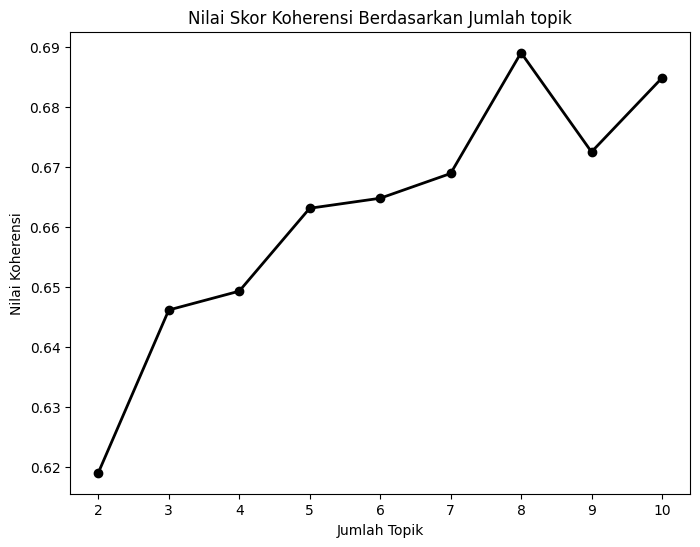

In [48]:
plt.figure(figsize = (8,6))
plt.plot(np.arange(2,11),coherence_scores , color = 'black', marker = 'o', linewidth = 2, label = f'coherence cv-{idx}')
plt.title("Nilai Skor Koherensi Berdasarkan Jumlah topik")
plt.xlabel("Jumlah Topik")
plt.ylabel("Nilai Koherensi")
plt.show()

**Catatan:**

Berdasarkan visualisasi di atas akan dipilih jumlah topik = 8 memiliki nilai koherensi yang tinggi dibandingkan dengan yang lainnya dan memilih jumlah topik 3, serta 4 sebagai jumlah topik yang terdekat. Oleh karena itu, selanjutnya akan dilihat dengan visualisasi apakah interpretasi topik dapat lebih mudah dibandingkan dengan jumlah topik = 2.

In [49]:
# Jumlah topik 8
lda_model_3 = gensim.models.ldamodel.LdaModel(corpus = corpus_t, id2word = id2word, num_topics = 3,
                                            random_state= random_state,chunksize = chunksize ,alpha = 'auto')
lda_model_4 = gensim.models.ldamodel.LdaModel(corpus = corpus_t, id2word = id2word, num_topics = 4,
                                            random_state= random_state,chunksize = chunksize ,alpha = 'auto')
lda_model_8 = gensim.models.ldamodel.LdaModel(corpus = corpus_t, id2word = id2word, num_topics = 8,
                                            random_state= random_state,chunksize = chunksize ,alpha = 'auto')

In [50]:
# Visualisasi hasil dari model dengan jumlah topik 3.
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_3, corpus_t, id2word, mds = 'mmds')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.252960  0.113646       1        1  44.833198
2     -0.025816 -0.274545       2        1  33.549548
0     -0.227144  0.160899       3        1  21.617254, topic_info=              Term         Freq        Total Category  logprob  loglift
7           sosial  4312.000000  4312.000000  Default  30.0000  30.0000
121         pentas  3252.000000  3252.000000  Default  29.0000  29.0000
3     media_sosial  1774.000000  1774.000000  Default  28.0000  28.0000
125     arab_saudi   810.000000   810.000000  Default  27.0000  27.0000
340         derita  1030.000000  1030.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
348   tim_nasional   128.831323   134.821059   Topic3  -4.9480   1.4862
2432         ujung   160.306266   181.732492   Topic3  -4.7295   1.4062
43          berita   339.250436   539.744900   Topic3  -3.9798   1.0673
322           muda   111.148436   451.077201   Topic3  -5.0957   0.1309
33       postingan   120.318782  3757.993629   Topic3  -5.0164  -1.9098

[152 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
396       2  0.004636    aisha
396       3  0.996708    aisha
504       3  0.992991  alvarez
293       1  0.008010   andres
293       3  0.989229   andres
...     ...       ...      ...
85        3  0.992038    video
163       3  0.994246    warga
291       2  0.997039   widodo
312       2  0.997804    world
471       3  0.990577      yuk

[197 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [51]:
# visualisasi hasil dari model dengan jumlah topik 4.
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_4, corpus_t, id2word, mds = 'mmds')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.290684 -0.172574       1        1  34.194085
2     -0.185136  0.262337       2        1  30.398314
3      0.203381 -0.279158       3        1  21.839405
0      0.272438  0.189396       4        1  13.568196, topic_info=              Term         Freq        Total Category  logprob  loglift
7           sosial  4642.000000  4642.000000  Default  30.0000  30.0000
121         pentas  3511.000000  3511.000000  Default  29.0000  29.0000
10           gagal  2861.000000  2861.000000  Default  28.0000  28.0000
33       postingan  4533.000000  4533.000000  Default  27.0000  27.0000
3     media_sosial  1876.000000  1876.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
490           aksi    59.661711    61.228593   Topic4  -5.2521   1.9715
1120     gelandang   128.525230   142.371988   Topic4  -4.4846   1.8951
1445     doorprize    70.047611    74.460404   Topic4  -5.0916   1.9363
1754        rambut    82.349887   104.275637   Topic4  -4.9298   1.7614
346          lipur    78.990421   179.958188   Topic4  -4.9714   1.1740

[185 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
396       3  0.993205    aisha
490       2  0.016332     aksi
490       4  0.979934     aksi
504       1  0.993470  alvarez
293       3  0.995556   andres
...     ...       ...      ...
85        4  0.992961    video
291       2  0.993360   widodo
312       2  0.997403    world
391       4  0.985247      yah
471       4  0.997650      yuk

[223 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

In [52]:
# visualisasi hasil dari model dengan jumlah topik 8.
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_8, corpus_t, id2word, mds = 'mmds')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.070526  0.400356       1        1  26.479744
6     -0.141732 -0.393740       2        1  18.842497
0     -0.373123 -0.160762       3        1  17.947893
1     -0.364069  0.215695       4        1  15.807508
2      0.262130 -0.319382       5        1   9.261200
5      0.411752  0.022489       6        1   7.000178
3      0.226205  0.269598       7        1   2.837583
7      0.049363 -0.034253       8        1   1.823398, topic_info=              Term         Freq        Total Category  logprob  loglift
121         pentas  4141.000000  4141.000000  Default  30.0000  30.0000
7           sosial  5335.000000  5335.000000  Default  29.0000  29.0000
33       postingan  5576.000000  5576.000000  Default  28.0000  28.0000
10           gagal  3252.000000  3252.000000  Default  27.0000  27.0000
3     media_sosial  2134.000000  2134.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
1404       babinsa    12.591936    13.710441   Topic8  -4.8007   3.9194
223         grafis     9.139281     9.955994   Topic8  -5.1212   3.9189
221   angkat_trofi    20.698435    22.846304   Topic8  -4.3037   3.9057
833          tekuk    11.650393    12.804685   Topic8  -4.8784   3.9100
955      pagelaran    12.105677    13.507504   Topic8  -4.8401   3.8949

[302 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1540      8  0.925096      acara
396       5  0.997446      aisha
504       6  0.992577    alvarez
1222      7  0.968290       aman
293       6  0.998187     andres
...     ...       ...        ...
826       8  0.989530  witkatspc
312       5  0.997461      world
391       2  0.980886        yah
65        1  0.997055        you
471       3  0.993018        yuk

[312 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 1, 2, 3, 6, 4, 8])

**Catatan:**

Berdasarkan visualisasi di atas, jumlah topik = 8 ,4 , dan 3 lebih sulit untuk diinterpretasikan untuk setiap topiknya karena kata-kata yang muncul pada beberapa topik kurang adanya hubungan antar katanya dan tidak merujuk ke suatu topik.Oleh karena itu, karena terlalu banyak topik yang tidak mempunyai suatu topik tertentu yang dibahas, maka akan dipilih jumlah topik = 2 dengan alasan lebih mudah diinterpretasikan.

## Analisis Graph dengan Gephi

In [54]:
users = data_clean['name']
tweets = data_clean['tweet']

graph = nx.Graph() # Graph Kosong Baru
graph.add_nodes_from(users)

print('Banyak vertex = ', graph.number_of_nodes())
print('Banyak Edges = ', graph.number_of_edges())

Banyak vertex =  4754
Banyak Edges =  0


In [55]:
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            graph.add_edge(usr, mention)
            
print('Banyak vertex = ', graph.number_of_nodes())
print('Banyak Edges = ', graph.number_of_edges())

Banyak vertex =  5339
Banyak Edges =  1061


## Visualisasi Graph dengan Gephi

Kemudian, akan dilakukan analisis menggunakan visualiasi Gephi mengenai pengguna Twitter yang sering disebut dalam `tweet` pengguna lain.

Pertama, akan dilakukan *Modularity Test* dan melihat pembagian cluster berdasarkan *Modularity Class*

### *Modularity Test*

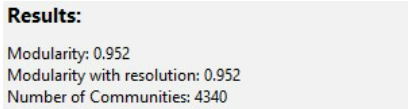

Nilai Modularity yang didapat adalah 0.952, yang mana cukup besar. Hal ini mengartikan bahwa data tercluster dengan baik. Klaster yang dimaksud dapat dilihat dari visualisasi berikutnya.

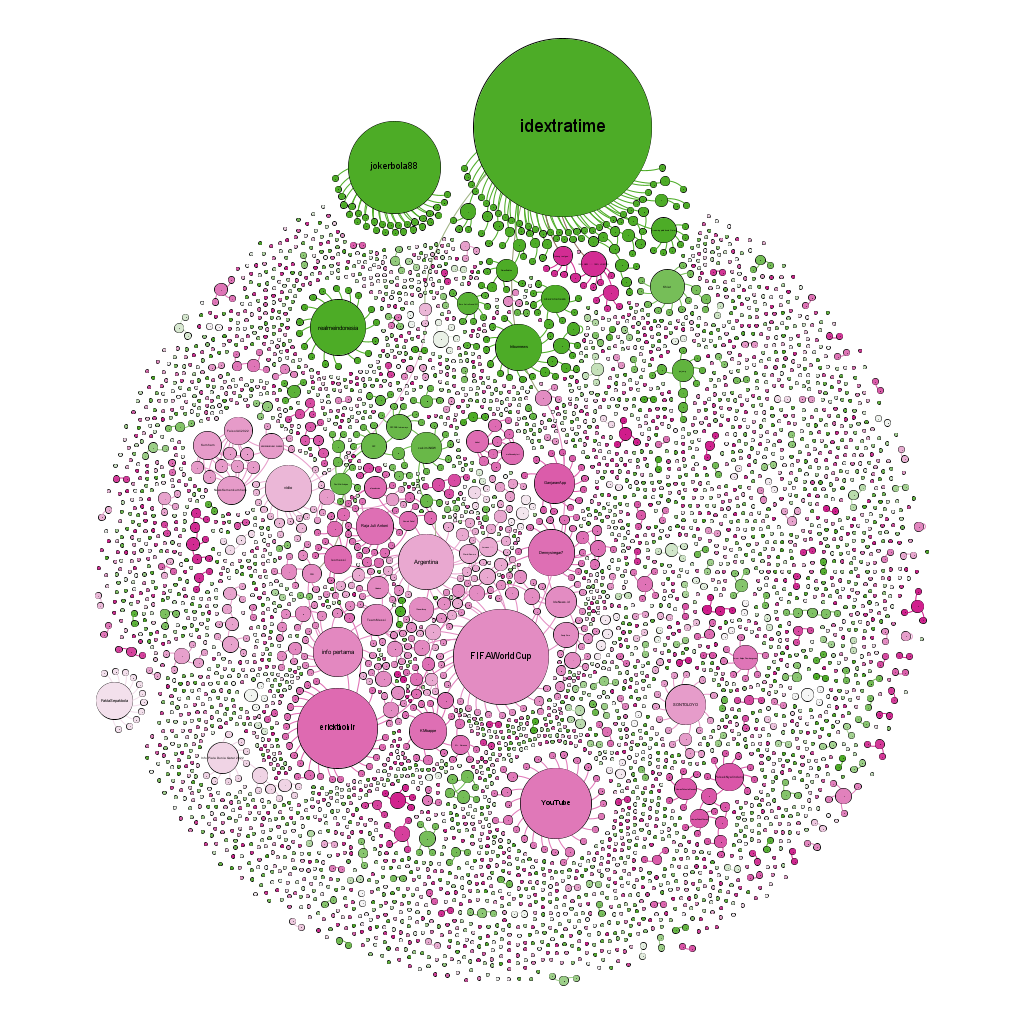

**Catatan:**

Berdasarkan hasil visualiasi di atas, terlihat bahwa data terbagi menjadi 2 klaster. Pembagian klaster tersebut dapat dilihat dari pembagian warna. Klaster 1 ditandai dengan warna Hijau dan klaster 2 dengan warna Pink)

### *Betweeness Centrality*

Kemudian, akan dilanjutkan dengan melihat *Betwenness Centrality*. Hal ini dilakukan untuk melihat *node* yang memiliki peran terbesar dalam clusternya.

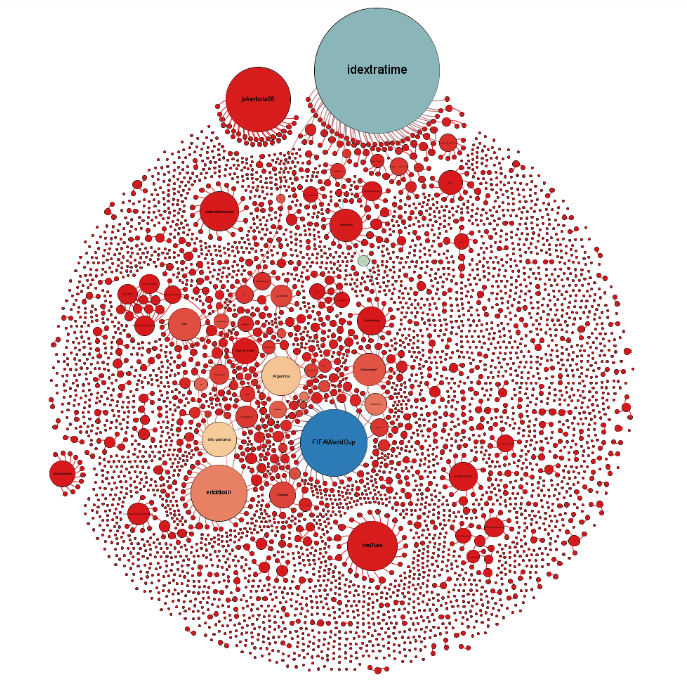

**Catatan:**

Dari visualisasi sebelumnya didapat bahwa terbentuk 2 klaster. *Node* `idextratime` dan `FIFAWorldCup` memiliki huruf paling besar, yang artinya kedua `username` pengguna tersebut memiliki skor *betweeness centrality* yang tinggi pada klasternya masing-masing. Hal ini berarti pengguna `idextratime` dan `FIFAWorldCup` mempunyai peran yang tinggi dalam pembicaraan mengenai Piala Dunia 2022 Qatar.

### Analisis *Cluster* dari Visualisasi Gephi

In [56]:
def tweet_mention(mentions):
    cluster_1 = 'idextratime'
    cluster_2 = 'FIFAWorldCup'
    
    if len(mentions) == 0:
        return 'no mentions'
    elif (cluster_1 in mentions) and (cluster_2 not in mentions):
        return 'cluster 1'
    elif (cluster_1 not in mentions) and (cluster_2 in mentions):
        return 'cluster 2'
    elif (cluster_1 in mentions) and (cluster_2 in mentions):
        return 'both mentioned'
    else:
        return 'another mention'

In [57]:
users = data_clean['name']
tweets = data_clean['tweet']

mention_per_tweets = []
for usr, t in zip(users, tweets):
    mention_per_tweet = []
    mentionS = re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            mention_per_tweet.append(mention)
    mention_per_tweets.append(mention_per_tweet)

In [59]:
data_clean['mentions'] = mention_per_tweets

In [60]:
data_clean['mention_cluster'] = data_clean.loc[:,'mentions'].apply(tweet_mention)

In [61]:
print(data_clean['mention_cluster'].value_counts(ascending = False))

no mentions        9968
another mention     856
cluster 1            74
cluster 2            43
Name: mention_cluster, dtype: int64


**Catatan:**

Terlihat terdapat 74 *tweet* yang menyebut pengguna `idextratime` dan 43 *tweet* yang menyebut pengguna `FIFAWorldCup`. Isi *tweet* yang dimaksud dapat dilihat di hasil berikut ini.

In [76]:
# Tweet yang menyebut pengguna 'idextratime' 
cluster_1 = data_clean[data_clean['mention_cluster'] == 'cluster 1']['tweet'].sample(10)
for idx, tweet in enumerate(cluster_1):
    print(f"tweet-{idx + 1} : {tweet}")

tweet-1 : @idextratime Admin ETI.. gak sia² lu min setiap hari bikin tweet kek gitu.. sumpah kalau lu ada disisi gue, udh gue peluk luh sambil bilang makasih udah menghiasi perjalanan Argentina sepanjang piala dunia Qatar 2022😭
tweet-2 : @gilangseva1 @Beginibegitulah @WitKatSpc @envyyyy78 @dolphinisasi @idextratime Argentina sblm juara piala dunia 2022 baru 2 X. Itupun terakhir juara 1985. Messi saat itu blm lahir. Juara Copa America terakhir tahun 1993. Baru tahun 2021 juara Copa America lagi bersama Messi.
tweet-3 : @idextratime pemain terbaik piala dunia 2022 ? pemain terbaik didunia kali maksudnya
tweet-4 : @idextratime Final UEFA Champions League 2009 Final Copa Amerika 2021 Final Piala Dunia 2022  3 Pemain Terbaik Dunia, Mbappe, Neymar, Dan Ronaldo, Semuanya kalah hanya dengan satu orang.  Lionel Andres Messi.
tweet-5 : @idextratime Yang nyari streaming bisa check bio kami
tweet-6 : @idextratime Wah kode nih argentina bakal angkat piala dunia 2022..🏆
tweet-7 : @frietjesliedjes @i

In [78]:
# Tweet yang menyebut pengguna 'FIFAWorldCup' 
cluster_2 = data_clean[data_clean['mention_cluster'] == 'cluster 2']['tweet'].sample(10)
for idx, tweet in enumerate(cluster_2):
    print(f"tweet-{idx + 1} : {tweet}")

tweet-1 : Hasil Pertandingan Final Piala Dunia 2022 Argentina vs Prancis, Pertandingan Puncak Penuh Drama  #ArgentinaVsFrance #FIFAWorldCup #PialaDunia2022  @Argentina @FIFAWorldCup  https://t.co/4Kr9tRTnWA
tweet-2 : @FIFAWorldCup Link Live Streaming Argentina Vs Prancis, Babak Final Piala Dunia 2022, Nobar Gratis di Sini!  #WorldCup I Messi I Mbappe #ArgentinaVsFrance   https://t.co/7uaSJxCMt6
tweet-3 : THE BEST WORLD CUP EVER - QATAR 2022  Banyak kontroversi, drama, dan ceritanya. Namun pada akhirnya menyajikan Piala Dunia terbaik dari awal hingga akhir. Congrats for Argentina🇦🇷🏆🥇 #WorldCup2022   See you soon WORLD CUP 2026 - USA🇺🇸 Mexico🇲🇽 Canada🇨🇦  Source🎥: @FIFAWorldCup  https://t.co/VyFo3ezZrl
tweet-4 : JANTUNGAN AWAK YG NONTON PIALA DUNIA 2022 INI !! 🇦🇷🇦🇷🇦🇷🇦🇷🍻 @FIFAWorldCup  @Argentina #FIFAWorldCup
tweet-5 : @FIFAWorldCup Piala Dunia 2022 Qatar menunjukkan: Ronaldo: manusia✅ Messi: alien✅  Manusia semakin tua itu makin lemah. Alien beda level. Jadi GOAT tetap CR7. Tapi GOD OF F

Dari beberapa *tweet* di atas, dapat dihasilkan informasi berikut:
* *tweet* yang menyebut pengguna `idextratime` cenderung membahas mengenai opini terhadap Piala Dunia 2022 Qatar (pemain, permainan, dsb.) dengan penyampaian *tweet* yang bersifat lebih informal.
* *tweet* yang menyebut pengguna `FIFAWorldCup` cenderung berisi informasi atau berita yang pernyampaiannya bersifat semi-formal hingga formal dibandingkan dengan *tweet* yang menyebut `idextratime`.

## Analisis Teks dengan Voyant

### Voyant 18 Desember 2022

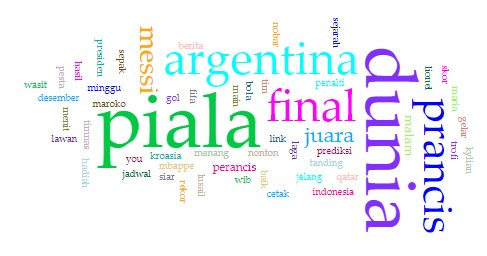

**Catatan:**

Berdasarkan data yang diperoleh dari tanggal 18 Desember 2022, dapat dilihat bahwa *Voyant Analysis* menunjukan banyaknya kata yang dibahas yaitu piala, dunia, argentina, final, dan prancis. Hal ini juga cenderung berkaitan dengan hari dilaksanakannya Final Piala Dunia Qatar 2022 antara Argentina vs Prancis yang jatuh pada tanggal 18 Desember 2022.

### Voyant 19 Desember 2022

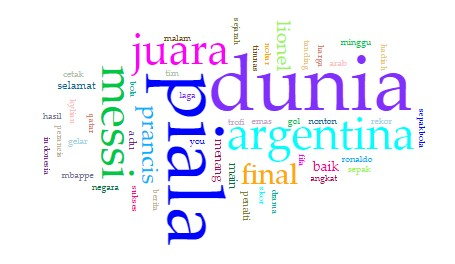

### Voyant 20 Desember 2022

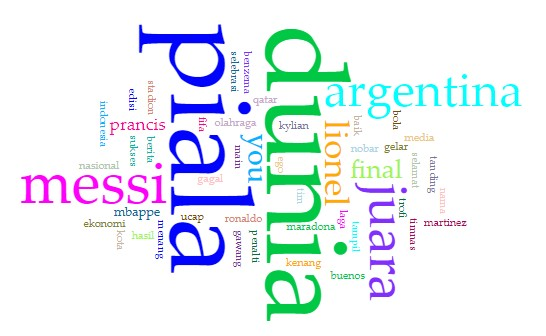

**Catatan:**

Berdasarkan data yang sudah diperoleh dari tanggal 19 dan 20 Desember 2022, dapat dilihat bahwa *Voyant Analysis* menunjukan banyaknya kata yang dibahas yaitu piala, dunia, messi, juara, dan argentina. Hal ini selaras dengan hasil Final Piala Dunia 2022 Qatar yaitu Argentina sebagai negara pemenangnya dan Messi sebagai pemain yang paling banyak dibicarakan.

### Voyant 18 - 20 Desember 2022

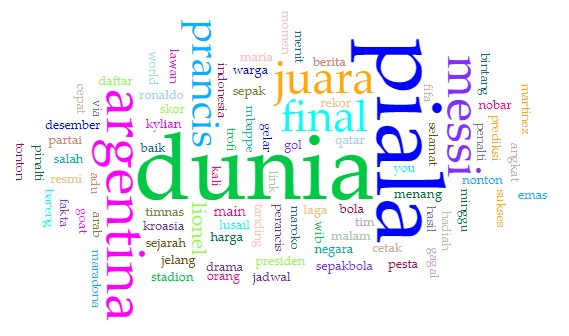

**Catatan:**

Secara keseluruhan, dari tanggal 18 - 20 Desember 2022, terlihat bahwa topik `tweet` yang sering dibicarakan adalah kemenangan Argentina atas Prancis dan menjadi juara Piala Dunia 2022 Qatar dengan Messi sebagai pemain yang paling banyak dibicarakan.

## Kesimpulan

Dari hasil analisis-analisis yang telah dilakukan sebelumnya, dapat disimpulkan beberapa poin berikut:
1. Terdapat **kecenderungan pengaruh** dari keberadaan media (video dan/atau foto) pada *tweet* (disertakan dan tidak disertakan) dengan asumsi faktor lain konstan (misalnya: popularitas akun, jumlah *followers*, keaktifan akun, dsb.)

<br>

2. Dari hasil *Topic Modelling* dengan metode *Latent Dirichlet Allocation* (LDA), diperoleh dua klaster topik utama yang diperbincangkan mengenai Piala Dunia 2022 Qatar. Kedua topik tersebut antara lain membahas:
    * Topik 1: kata-kata relevan yang muncul, yaitu sosial, pentas, banjir, sara, kylian, gagal, dst. di mana diasumsikan topik pertama cenderung mengaitkan ke tokoh sepak bola Prancis, yaitu **Kylian Mbappe dan timnya yang gagal memenangkan juara dunia**.
    * Topik 2: kata-kata relevan yang muncul, yaitu arab_saudi, dunia, penuh_warna, pesta, derita, argentina, dst. di mana diasumsikan topik kedua cenderung mengaitkan ke **tim sepak bola Argentina yang berhasil memperoleh juara dunia**.

<br>

3. Dari hasil visualisasi Gephi, diperoleh dua klaster, di mana tiap klaster memiliki satu akun pengguna yang sering disebut dalam *tweet* pengguna lain.
    * *tweet* yang menyebut pengguna `idextratime` cenderung membahas mengenai **opini terhadap Piala Dunia 2022 Qatar** (pemain, permainan, dsb.) dengan penyampaian *tweet* yang bersifat lebih informal.
    * *tweet* yang menyebut pengguna `FIFAWorldCup` cenderung berisi **informasi atau berita tentang Piala Dunia 2022 Qatar** yang pernyampaiannya bersifat semi-formal hingga formal dibandingkan dengan *tweet* yang menyebut `idextratime`.

<br>

4. Dari hasil *Voyant Analysis*, diperoleh dari tanggal 18 - 20 Desember 2022, terlihat bahwa topik `tweet` yang sering dibicarakan adalah **kemenangan Argentina atas Prancis dan menjadi juara Piala Dunia 2022 Qatar dengan Messi sebagai pemain yang paling banyak dibicarakan**.

# Terima kasih!